# 2neoron stuff

## setup

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA
from ipywidgets import *
from manim import *

np.set_printoptions(precision=3, suppress=True, linewidth=100)


In [3]:
def plotLayout(ax,xlim,ylim,title,xlab,ylab):
    # prepares a plot layout
    # Where:
    #- axis ax: figures axis
    #- param xlim: (xmin,xmax)x range of plot
    #- param ylim: (ymin,ymax)y range of plot

    #   Refine plot
    ax.grid(True)
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.set_title(title)
    ax.set_xlabel(xlab)
    ax.set_ylabel(ylab)

In [4]:
#import needed: numpy, pyplot, plotLayout
def nd_orbit(fnct, x0, it):
    # calculates orbits of n dimensional map
    # Where:
    #- param fnct: Mapping function mapping x0 to x1 taking a single parameter
    #- param x0: Initial value
    #- param it: Number of iterations
    #- returns: The entire orbit, including the initial value
    #   Initialize
    orbit = np.zeros((len(x0),it))
    orbit[:,0]=x0
    #   Main loop
    for i in range(it-1):
        orbit[:,i+1] = fnct(orbit[:,i])
    return orbit

In [5]:
def activation(x):
    #the actication  function f()
    #return (x+abs(x))/2 #ReLu
    return 1/(1+np.exp(-x)) #sigmoid 
    #return np.tanh(x) #tanh

In [6]:
#import needed: numpy, pyplot, plotLayout, nd_orbit
def neuron_2_discrete(x0,a,b,alpha ,Nit, ntrans):
    # calculates stable solution henon map
    # Where:
    #- param x0: Initial value
    #- param a: Parameters of Henon map, being [a,b] in the standard expression
    #- returns: An array containing the orbit of the Henon map without transients

    #   Initialize  
    linearmap = lambda xy: alpha * (a @ activation(xy) + b)
    n_iter = Nit
    # n_steps_until_stable = 100

    #   Calculate orbit
    orbit = nd_orbit(linearmap, x0, n_iter)
    orbit = orbit[:, ntrans+1:] #remove the transient (+1 to also remove initial condition)
    return orbit


## paramter explorations

### symetric (1,-w ,-w,1) test

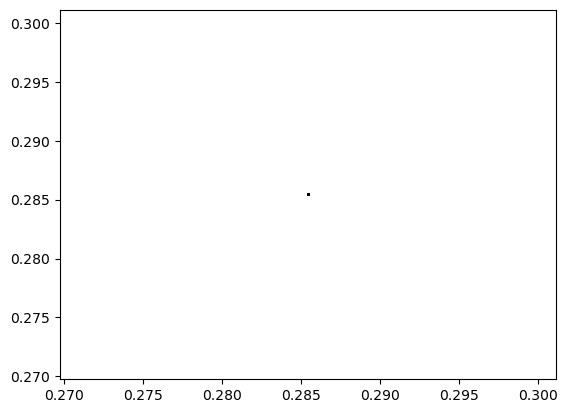

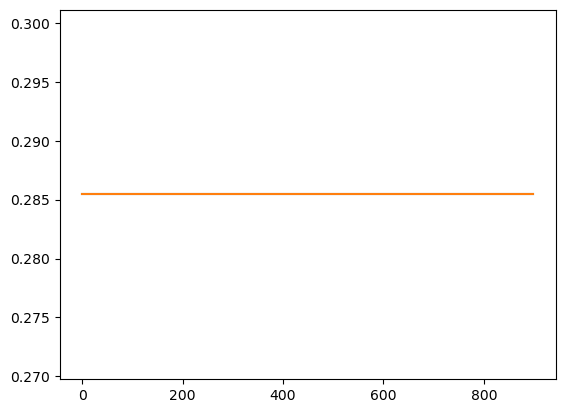

In [7]:

#Call the function henon_orbit_after_transients
alpha=1
x0 = -np.array([-0.1,0.1])
a = np.array([[1,-0.5],
              [-0.5,1]])
b=0
orbit = neuron_2_discrete(x0,a,b,alpha,1000,100)
fig, ax = plt.subplots(ncols=1)
ax.scatter(orbit[0,:],orbit[1,:],c='k',s=1)
plt.show()
plt.plot(orbit[0,:], label=r'$x_1(t)$')
plt.plot(orbit[1,:], label=r'$x_2(t)$')

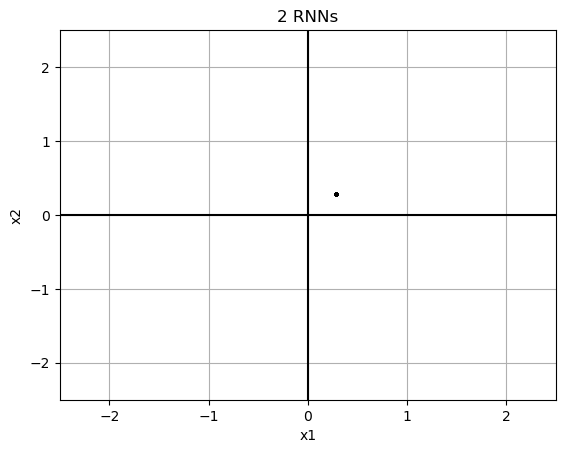

In [8]:
grid_size = 10
a = np.array([[1,-0.5],
              [-0.5,1]])
# b = np.array([0.,0.])
fig, ax = plt.subplots(ncols=1)
plotLayout(ax,[-2.5,2.5],[-2.5,2.5],'2 RNNs','x1','x2')

x_coords = np.linspace(-2, 2, grid_size)
y_coords = np.linspace(-2, 2, grid_size)

for x in x_coords:
    for y in y_coords:
        orbit = neuron_2_discrete([x,y],a,b, alpha,1000,100)

        ax.scatter(orbit[0,:],orbit[1,:],c='k',s=3)

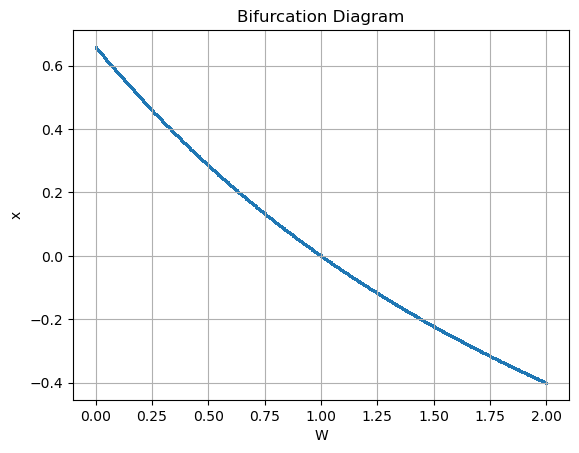

In [9]:
def bifurcation_diagram(weight_range, b, x0, steps=200, last_steps=50):
    x1_values = []
    weights = []
    for w in weight_range:
        W = np.array([[1, -w], [-w, 1]])  # Symmetric weight matrix
        x_values = neuron_2_discrete(x0, W, b,alpha, steps,last_steps)
        # Only take the last few steps to plot bifurcation points
        x1_values.extend(x_values[0, -last_steps:])
        weights.extend([w] * last_steps)
    
    plt.scatter(weights, x1_values, s=0.5)
    plt.xlabel("W")
    plt.ylabel('x')
    plt.title("Bifurcation Diagram")
    plt.grid()
    plt.show()
x0 = -np.array([-0.1,0.1])
weight_range = np.linspace(0, 2, 500)  # Range of weights to explore
bifurcation_diagram(weight_range, b, x0)

### angular rotation matrix 

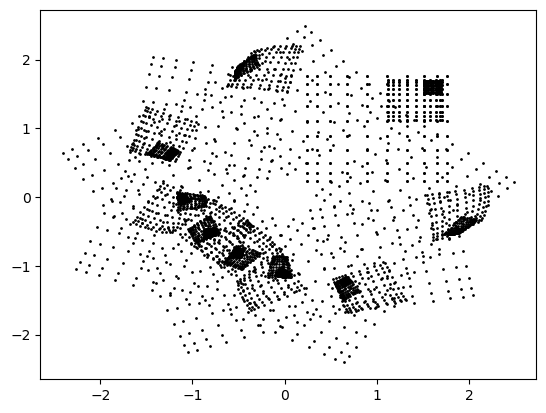

In [10]:
grid_size = 10
alpha = 2
a = lambda theta: np.array([[np.cos(theta),np.sin(theta)],
                    [-np.sin(theta),np.cos(theta)]])
# b = np.array([0.,0.])
fig, ax = plt.subplots(ncols=1)
# plotLayout(ax,[-.5,.5],[-.5,.5],'2 RNNs','x1','x2')

x_coords = np.linspace(-2, 2, grid_size)
y_coords = np.linspace(-2, 2, grid_size)
thetas = np.linspace(0, 2* np.pi, grid_size)
for theta in thetas:
    for x in x_coords:
        for y in y_coords:
            
            orbit = neuron_2_discrete([x,y],a(theta),b,alpha,100,0)

            ax.scatter(orbit[0,:],orbit[1,:],c='k',s=1)

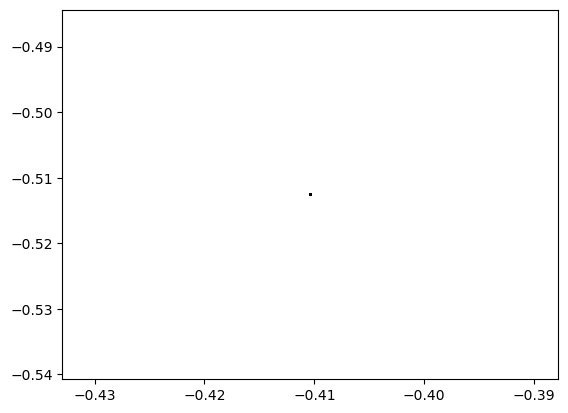

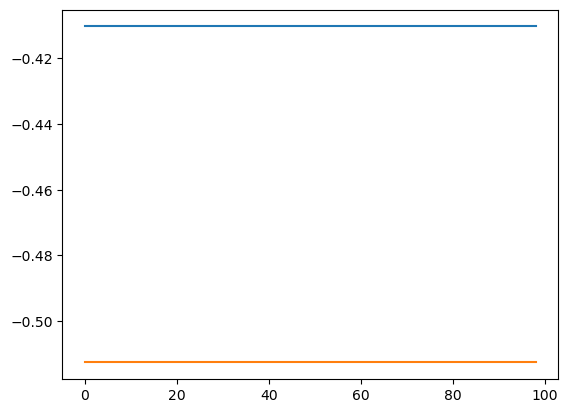

In [11]:
x0 = -np.array([0.1,0.1])
alpha = 1.2
orbit = neuron_2_discrete(x0,a(3),b,alpha,1000,900)
fig, ax = plt.subplots(ncols=1)
ax.scatter(orbit[0,:],orbit[1,:],c='k',s=1)
plt.show()
plt.plot(orbit[0,:], label=r'$x_1(t)$')
plt.plot(orbit[1,:], label=r'$x_2(t)$')
plotLayout(ax,[-2.5,2.5],[-2.5,2.5],'2 RNNs','x1','x2')


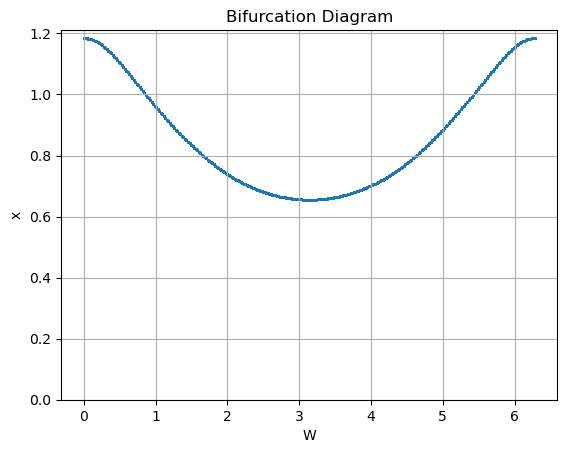

In [12]:
def bifurcation_diagram(thetas,a, b, x0, steps=2000, last_steps=100):
    x1_values = []
    weights = []
    for theta in thetas:
        
        x_values = neuron_2_discrete(x0, a(theta), b,alpha, steps,last_steps)
        x_values = np.linalg.norm(x_values,axis=0)
        # Only take the last few steps to plot bifurcation points
        x1_values.extend(x_values[ -last_steps:])
        weights.extend([theta] * last_steps)
    
    plt.scatter(weights, x1_values, s=0.5)
    plt.xlabel("W")
    plt.ylabel('x')
    plt.title("Bifurcation Diagram")
    plt.ylim(0)
    plt.grid()
    plt.show()
x0 = -np.array([-0.1,0.1])
a = lambda theta: np.array([[np.cos(theta),np.sin(theta)],
                    [-np.sin(theta),np.cos(theta)]])
thetas = np.linspace(0, 2* np.pi, 300)
  # Range of weights to explore
bifurcation_diagram(thetas,a, b, x0)

### recreating isoperiod phase plot (figure 1)


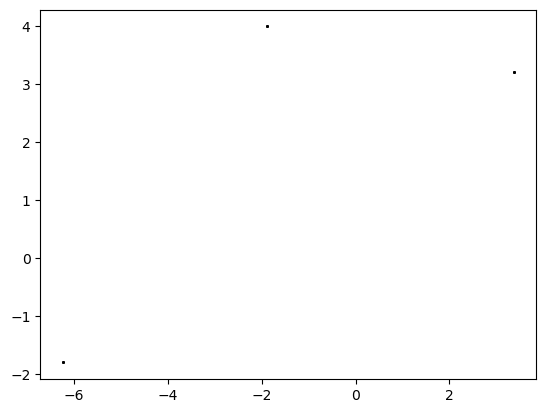

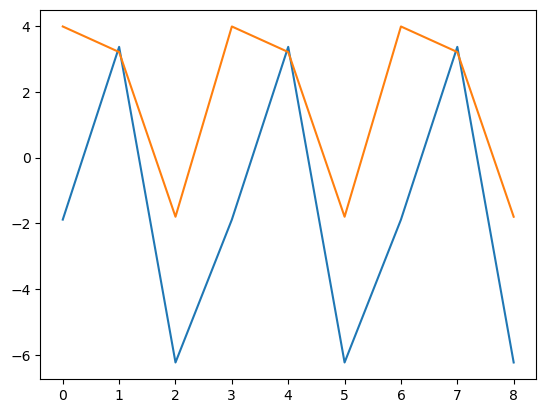

In [13]:
x0 = -np.array([0.1,0.1])
w11 = -11.3
w12 = 8
a = np.array([[w11,w12],
              [-6,0]])
b= np.array([-3,4])
alpha = 1
orbit = neuron_2_discrete(x0,a,b,alpha,1000,990)
fig, ax = plt.subplots(ncols=1)
ax.scatter(orbit[0,:],orbit[1,:],c='k',s=1)
plt.show()
plt.plot(orbit[0,:], label=r'$x_1(t)$')
plt.plot(orbit[1,:], label=r'$x_2(t)$')
plotLayout(ax,[-2.5,2.5],[-2.5,2.5],'2 RNNs','x1','x2')


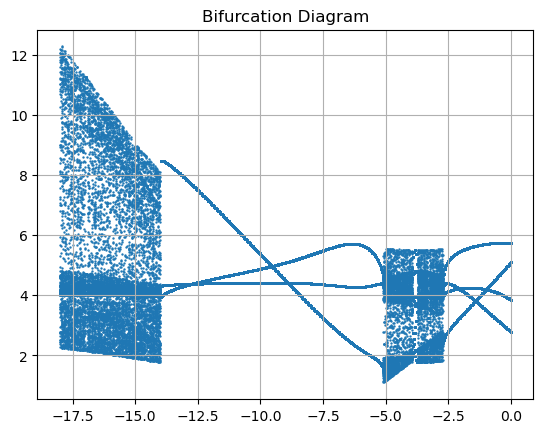

In [14]:
def bifurcation_diagram(params,a, b, x0, steps=2000, last_steps=100):
    x1_values = []
    paramlist = []
    for param in params:
        
        x_values = neuron_2_discrete(x0, a(param), b,alpha, steps,last_steps)
        x_values = np.linalg.norm(x_values,axis=0)
        # Only take the last few steps to plot bifurcation points
        x1_values.extend(x_values[ -last_steps:])
        paramlist.extend([param] * last_steps)
    
    plt.scatter(paramlist, x1_values, s=0.5)
    plt.title("Bifurcation Diagram")
    # plt.ylim(0)
    plt.grid()
    plt.show()
x0 = -np.array([-0.1,0.1])
a = lambda param: np.array([[param,8],
              [-6,0]])
params = np.linspace(-18, 0, 600)
  # Range of weights to explore
bifurcation_diagram(params,a, b, x0)

### recreating isoperiod phase plot (figure 2)


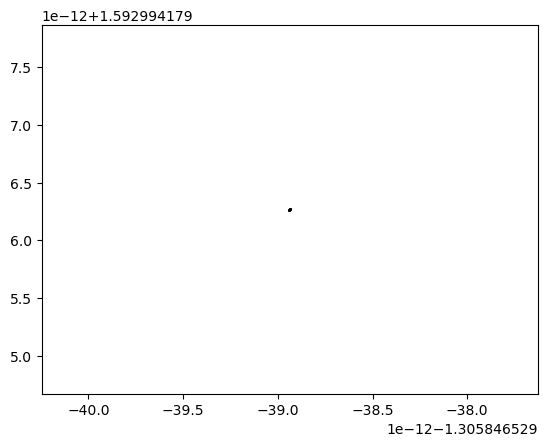

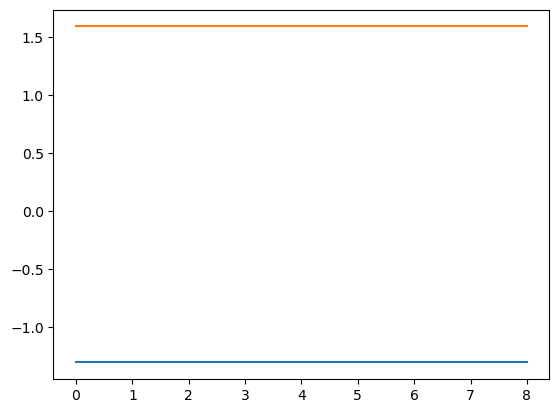

In [15]:
x0 = -np.array([0.1,0.1])
w11 = -11.3
w12 = 5.9
a = np.array([[w11,w12],
              [-6.6,0]])
b = np.array([-3.8,3])
alpha = 1
orbit = neuron_2_discrete(x0,a,b,alpha,1000,990)
fig, ax = plt.subplots(ncols=1)
ax.scatter(orbit[0,:],orbit[1,:],c='k',s=1)
plt.show()
plt.plot(orbit[0,:], label=r'$x_1(t)$')
plt.plot(orbit[1,:], label=r'$x_2(t)$')
plotLayout(ax,[-2.5,2.5],[-2.5,2.5],'2 RNNs','x1','x2')


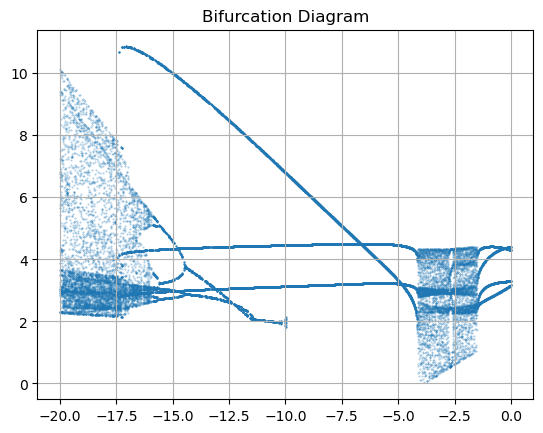

In [16]:

def bifurcation_diagram(params,a, b, x0, steps=300, last_steps=20):
    x1_values = []
    paramlist = []
    for param in params:
        
        x_values = neuron_2_discrete(np.random.random(2), a(param), b,alpha, steps,steps-last_steps-1)
        x_values = np.linalg.norm(x_values,axis=0)
        # Only take the last few steps to plot bifurcation points
        x1_values.extend(x_values[ -last_steps:])
        paramlist.extend([param] * last_steps)
    #return len(paramlist), len(x1_values)
    plt.scatter(paramlist, x1_values, s=0.2,alpha=0.4)
    plt.title("Bifurcation Diagram")
    # plt.ylim(0)
    plt.grid()
    plt.show()
x0 = -np.array([-1.7,0.1])
a = lambda param: np.array([[param,5.9],
              [-6.6,0]])
b = np.array([-3.8,3])

params = np.linspace(-20, 0, 2000)
  # Range of weights to explore
bifurcation_diagram(params,a, b, x0)

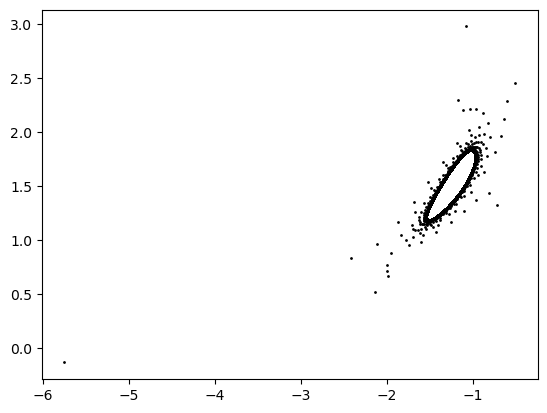

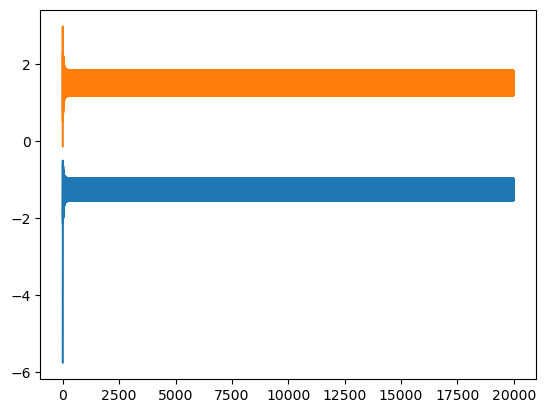

In [22]:
x0 = -np.array([0.1,0.1])
w11 = -10
w12 = 5.9
a = np.array([[w11,w12],
              [-6.6,0]])
b = np.array([-3.8,3])
alpha = 1
orbit = neuron_2_discrete(x0,a,b,alpha,20000,0)
fig, ax = plt.subplots(ncols=1)
ax.scatter(orbit[0,:],orbit[1,:],c='k',s=1)
plt.show()
plt.plot(orbit[0,:], label=r'$x_1(t)$')
plt.plot(orbit[1,:], label=r'$x_2(t)$')
plotLayout(ax,[-2.5,2.5],[-2.5,2.5],'2 RNNs','x1','x2')


In [18]:
def orbit_generate():
    x0 = -np.array([0.1,0.1])
    w11 = -10
    w12 = 5.9
    a = np.array([[w11,w12],
                [-6.6,0]])
    b = np.array([-3.8,3])
    alpha = 1
    orbit = neuron_2_discrete(x0,a,b,alpha,200,0)
    return orbit

In [19]:
%%manim -ql -v WARNING plorbit

class plorbit(Scene):
    def calculate_axis_ranges(self, points):
        """
        Calculate the x and y axis ranges based on the min and max
        values of the orbit points.
        """
        # Extract x and y coordinates
        x_values = [h[0] for h in points]
        y_values = [h[1] for h in points]

        # Calculate min and max for x and y
        x_min, x_max = min(x_values), max(x_values)
        y_min, y_max = min(y_values), max(y_values)

        # Add padding to the axis ranges for better visualization
        padding_factor = 0.1  # 10% padding on each side
        x_padding = (x_max - x_min) * padding_factor
        y_padding = (y_max - y_min) * padding_factor

        # Return the padded ranges
        return x_min - x_padding, x_max + x_padding, y_min - y_padding, y_max + y_padding
    def animate(self,orbit_points):
        # Create axes for the orbit plot
        x_min, x_max, y_min, y_max = self.calculate_axis_ranges(orbit_points)

        # Create axes dynamically based on the calculated ranges
        axes = Axes(
            x_range=[x_min, x_max, (x_max - x_min) / 4],  # Divide into 4 intervals
            y_range=[y_min, y_max, (y_max - y_min) / 4],
            x_length=6,  # Length in units
            y_length=6,
            axis_config={"color": BLUE}
        )
        # axes = Axes(
        #     x_range=[-2, 2, 0.5], y_range=[-2, 2, 0.5],
        #     x_length=6, y_length=6,
        #     axis_config={"color": BLUE}
        # )
        labels = axes.get_axis_labels(x_label="h1", y_label="h2")
        numberplane = NumberPlane()
        self.add(axes, labels)
        #self.play(Create(axes), Write(labels))
        # Convert the simulated points to Manim points on the 2D plane
        orbit_points_manim = [
            axes.c2p(orbit[0,i],orbit[1,i]) for i in range(orbit.shape[1])
        ]
        # Create the orbit as a line with a moving dot
        orbit_path = VMobject(color=BLUE)
        orbit_path.set_points_as_corners(orbit_points_manim)
        moving_dot = Dot(orbit_points_manim[0], color=RED)

        # Animation: Draw the orbit path and move the dot along the path
        self.play(Create(orbit_path), FadeIn(moving_dot))
        self.play(MoveAlongPath(moving_dot, orbit_path), run_time=8, rate_func=linear)

        # Hold the final state for a moment
        self.wait(2)
    def construct(self):
        orbit_points = orbit_generate()
        self.animate(orbit_points)


Manim Community v0.18.1